# Import 

### Importing the libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Importing the dataset

In [2]:
train = pd.read_csv('C:/Users/SONU KUMAR JHA/Documents/R/Datasets/adult.csv/adult.csv')

In [3]:
df = train.copy()

### Preprocessing

In [4]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [5]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [6]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [7]:
df = df.replace(['?'],np.nan)

In [8]:
df.isnull().sum().sort_values(ascending=False)

occupation        1843
workclass         1836
native.country     583
income               0
hours.per.week       0
capital.loss         0
capital.gain         0
sex                  0
race                 0
relationship         0
marital.status       0
education.num        0
education            0
fnlwgt               0
age                  0
dtype: int64

In [13]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [14]:
df.describe(exclude=np.number)

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
count,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,8,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,24532,10501,14976,5983,13193,27816,21790,29753,24720


In [15]:
# Replacing the missing value
for x in df.columns[:]:
    if df[x].dtype =='object':
        df[x].fillna(df[x].mode()[0],inplace=True)

In [16]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

In [17]:
df.workclass.value_counts()

Private             24532
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [18]:
from sklearn.preprocessing import LabelEncoder
colname = []
for x in df.columns:
    if df[x].dtype == 'object':
        colname.append(x)
colname

['workclass',
 'education',
 'marital.status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native.country',
 'income']

In [20]:
# Label Encoding 
from sklearn import preprocessing
le = {}
for x in colname:
    le[x] = preprocessing.LabelEncoder()
for x in colname:
    df[x] = le[x].fit_transform(df[x])

In [23]:
X = df.copy()
y = X.pop('income')

## Fitting the model

In [24]:
from sklearn.ensemble import RandomForestClassifier
m = RandomForestClassifier(n_jobs=-1,oob_score=True,n_estimators=100)
%time m.fit(X,y)
m.score(X,y),m.oob_score_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


Wall time: 4.26 s


(0.9999078652375541, 0.8540892478732226)

# Tuning the model

### Optimal Number of tree

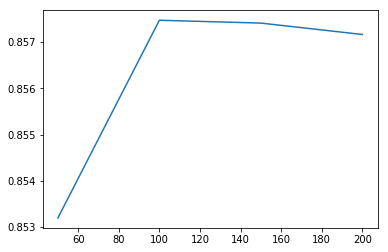

In [25]:
# Optimal Number of tree
results = []
ntree = [50,100,150,200]
for tree in ntree:
    m = RandomForestClassifier(n_jobs=-1,n_estimators=tree,oob_score=True,random_state=42)
    m.fit(X,y)
    roc = m.oob_score_
    results.append(roc)

pd.Series(results,ntree).plot()

### Optimal number of max_features

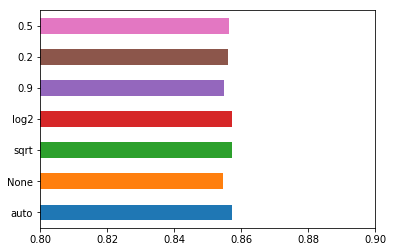

In [26]:
results = []
max_feature_options = ['auto',None,'sqrt','log2',.9,.2,.5]
for max_features in max_feature_options:
    m = RandomForestClassifier(n_jobs=-1,n_estimators=150,oob_score=True,random_state=42,max_features=max_features)
    m.fit(X,y)
    res = m.oob_score_
    results.append(res)

pd.Series(results,max_feature_options).plot(kind='barh',xlim=(.8,.9))

### Optimal number of minimum sample leaf

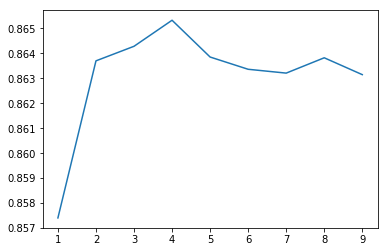

In [27]:
results = []
min_samples = [1,2,3,4,5,6,7,8,9]
for min_sample in min_samples:
    m = RandomForestClassifier(n_jobs=-1,n_estimators=150,oob_score=True,random_state=42,min_samples_leaf=min_sample)
    m.fit(X,y)
    res = m.oob_score_
    results.append(res)

pd.Series(results,min_samples).plot()

### Optimal number of maximum depth of tree

Wall time: 1.62 s
Wall time: 1.74 s
Wall time: 2.03 s
Wall time: 2.18 s
Wall time: 2.39 s
Wall time: 2.42 s
Wall time: 2.6 s
Wall time: 2.91 s
Wall time: 3.17 s


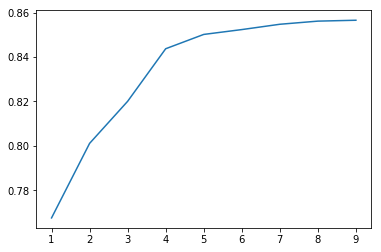

In [28]:
results = []
max_depth_options = [1,2,3,4,5,6,7,8,9]
for depth in max_depth_options:
    m = RandomForestClassifier(n_jobs=-1,n_estimators=150,oob_score=True,random_state=42,min_samples_leaf=2,max_depth=depth)
    %time m.fit(X,y)
    res = m.oob_score_
    results.append(res)

pd.Series(results,max_depth_options).plot()

## Final Model after tuning

In [29]:
m = RandomForestClassifier(n_jobs=-1,oob_score=True,n_estimators=150,min_samples_leaf=2,max_depth=7)
%time m.fit(X,y)
m.score(X,y),m.oob_score_

Wall time: 2.82 s


(0.8577132151960934, 0.8546727680353797)

# Feature Imprtance

In [30]:
def rf_feat_importance(m,df):
    return pd.DataFrame({'cols':df.columns,
                       'imp':m.feature_importances_}).sort_values(by='imp',ascending=False)

In [31]:
fi = rf_feat_importance(m, X);fi[:10]

,cols,imp
10,capital.gain,0.222768
7,relationship,0.217646
4,education.num,0.167024
5,marital.status,0.153786
0,age,0.062092
12,hours.per.week,0.054790
11,capital.loss,0.043883
3,education,0.030707
9,sex,0.022486
6,occupation,0.013403


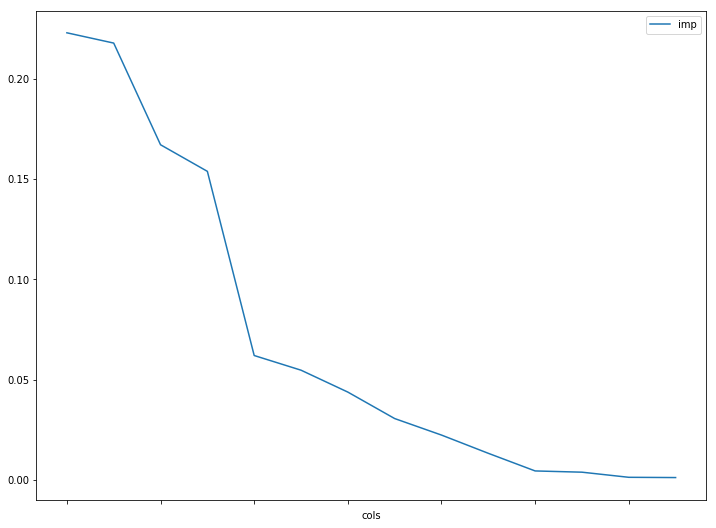

In [32]:
fi.plot('cols','imp',figsize=(12,9))

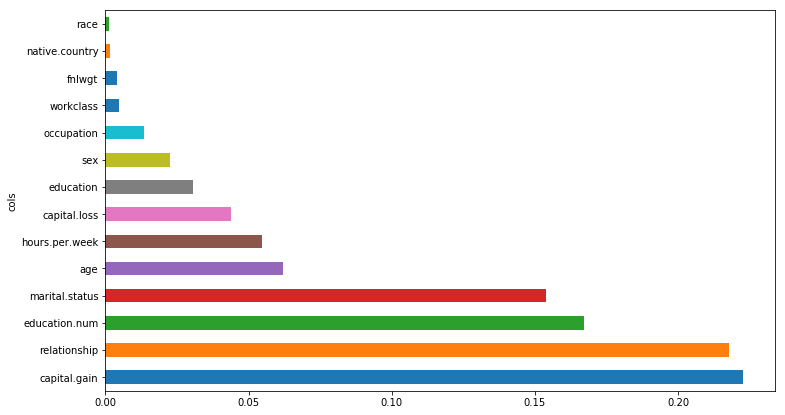

In [33]:
def plot_fi(fi): 
  return fi.plot('cols','imp','barh', figsize=(12,7), legend=False)
plot_fi(fi[:30])

## Removing rebundent features

In [34]:
to_keep = fi[fi.imp>0.005].cols
X_keep= X[to_keep].copy()
len(to_keep)

10

In [35]:
# Splitting the dataset into training and test set
from sklearn.model_selection import train_test_split
X_train,X_valid,y_train,y_valid = train_test_split(X_keep,y,test_size=.3)

In [36]:
# Fitting the model
from sklearn.ensemble import RandomForestClassifier
m = RandomForestClassifier(n_jobs=-1,n_estimators=150,min_samples_leaf=2,oob_score=True,max_depth=7)
%time m.fit(X_train,y_train)
m.score(X_train,y_train),m.score(X_valid,y_valid),m.oob_score_

Wall time: 2.06 s


(0.8580642330642331, 0.8567918927218753, 0.8547297297297297)

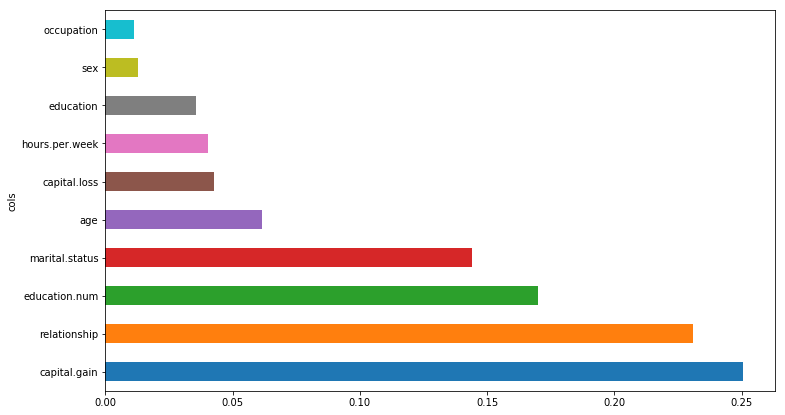

In [37]:
fi = rf_feat_importance(m, X_keep)
plot_fi(fi)

### Finding Nearest Features using Pearsan Correlation 

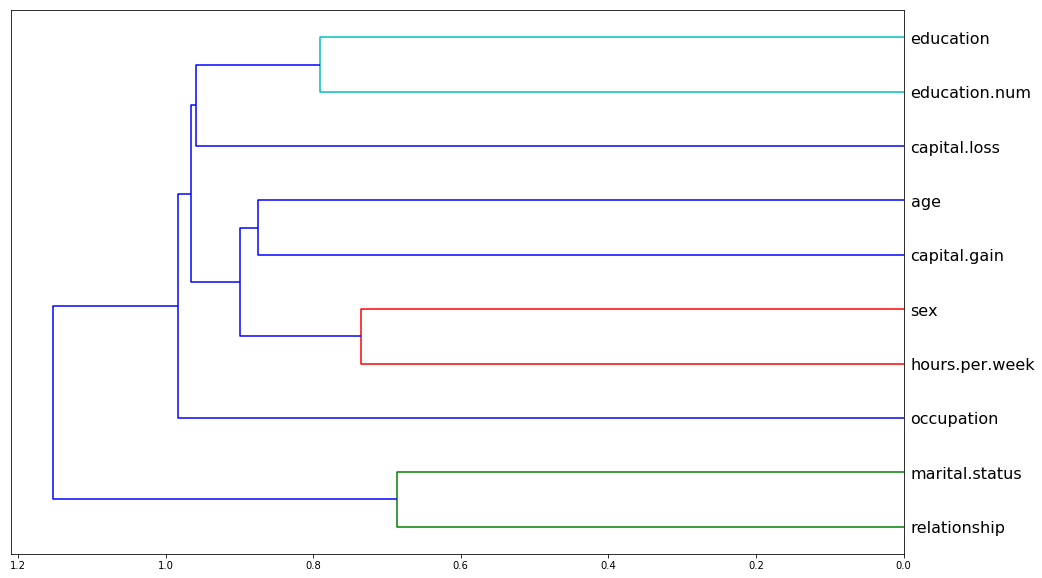

In [38]:
from scipy.cluster import hierarchy as hc
import scipy
corr = np.round(scipy.stats.spearmanr(X_keep).correlation, 4)
corr_condensed = hc.distance.squareform(1-corr)
z = hc.linkage(corr_condensed, method='average')
fig = plt.figure(figsize=(16,10))
dendrogram = hc.dendrogram(z, labels=X_keep.columns, 
      orientation='left', leaf_font_size=16)
plt.show()

In [39]:
def get_oob(df):
    m = RandomForestClassifier(n_jobs=-1,n_estimators=15,min_samples_leaf=2,max_depth=7,oob_score=True)
    X_train,X_valid,y_train,y_valid = train_test_split(df,y,test_size=.3)
    m.fit(X_train,y_train)
    return m.oob_score_

In [40]:
get_oob(X_keep)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


0.8528869778869779

# Tree Interpreter